## Attribute Information

**age**: age in years \
**sex**: sex (1 = male; 0 = female) \
**cp**: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic \
**trestbps**: resting blood pressure (in mm Hg on admission to the hospital) trestbps \
**chol**: serum cholestoral in mg/dl \
**fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) \
**restecg**: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria \
**thalach**: maximum heart rate achieved \
**exang**: exercise induced angina (1 = yes; 0 = no) \
**oldpeak** = ST depression induced by exercise relative to rest \
**slope**: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping \
**ca**: number of major vessels (0-3) colored by flourosopyca \
**thal**: 3 = normal; 6 = fixed defect \
**target** - diagnosis of heart disease (angiographic disease status) -- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing (in any major vessel: attributes \


In [33]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# import dataset
heart_disease_data = pd.read_csv('heart.csv')
heart_disease_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [35]:
heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [36]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [37]:
heart_disease_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

From the above cell we can note that there are 526 patients with heart disease and 499 patients without heart disease.

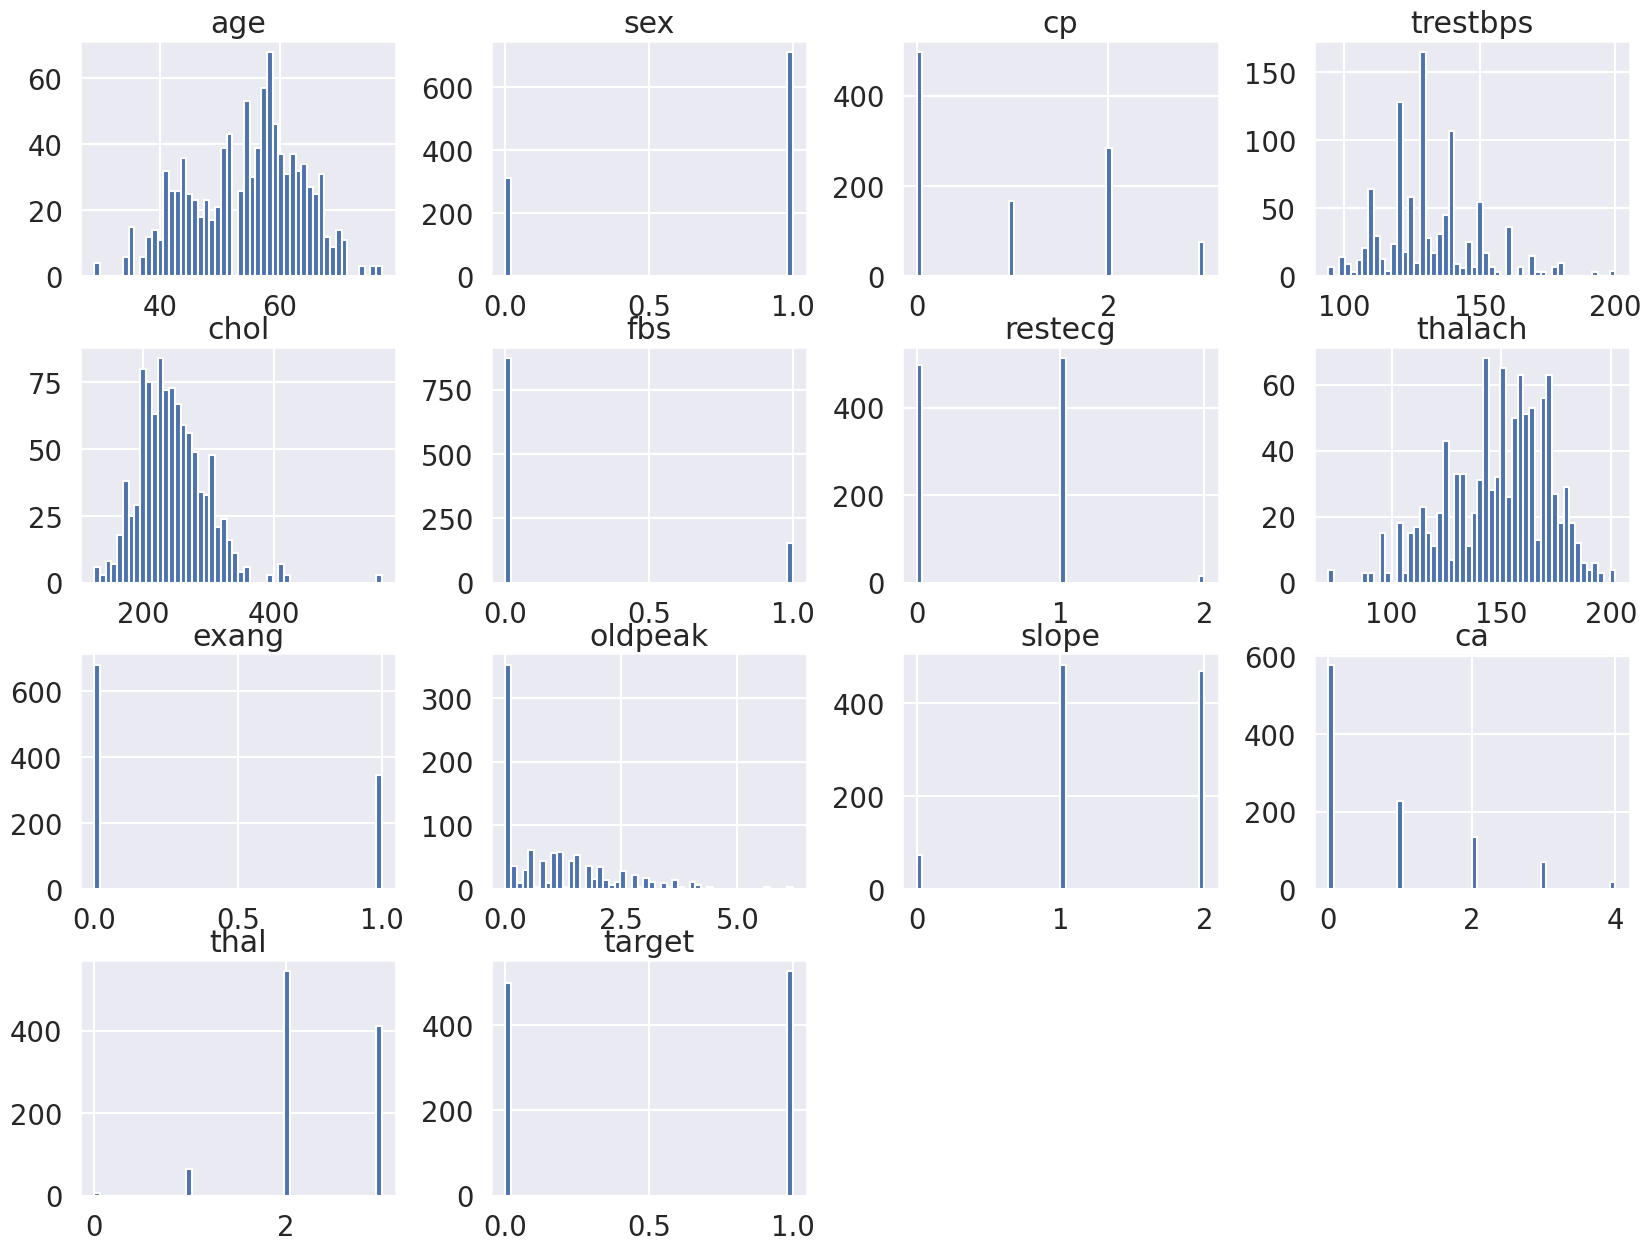

In [38]:
%matplotlib inline
heart_disease_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [39]:
#Looking for possible correlation patterns in the datasets
corr_matrix = heart_disease_data.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

In [40]:
heart_disease_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Heat Map to find correlations amongst attributes and features.

<AxesSubplot:>

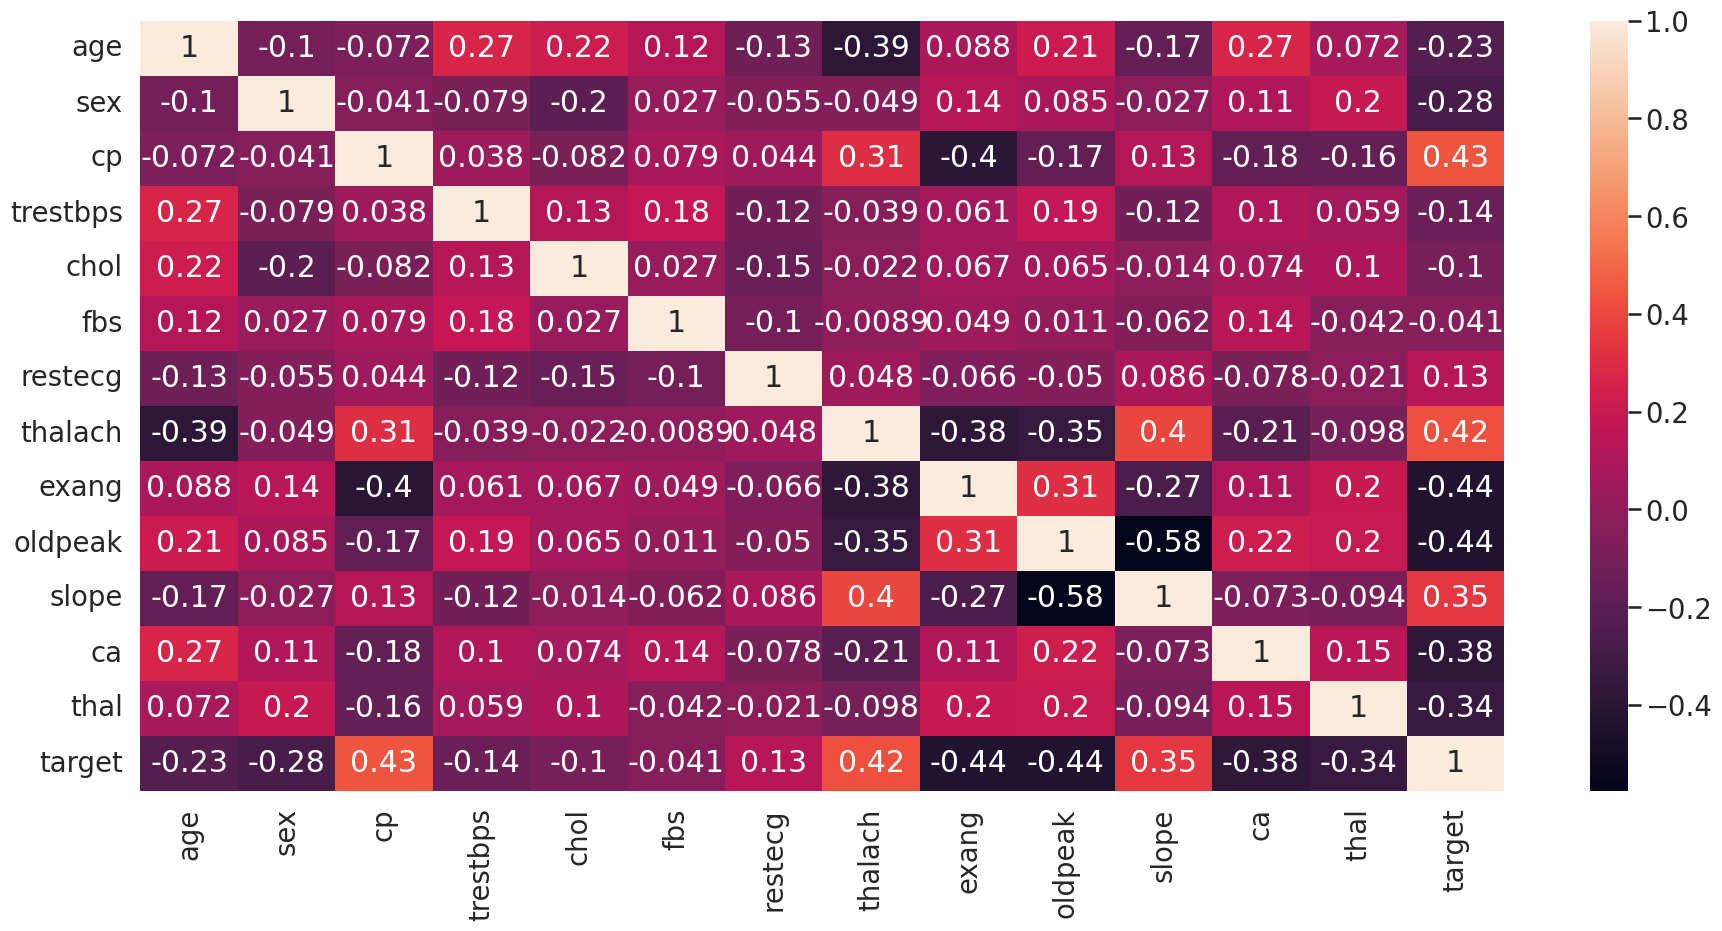

In [41]:
sns.set(rc={'figure.figsize':(22,10)})
sns.set_context("talk", font_scale=1.2)
sns.heatmap(
    heart_disease_data.loc[:, ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']].corr(),
    annot=True
)

Frequence VS Age Plot

Text(0, 0.5, 'Frequency')

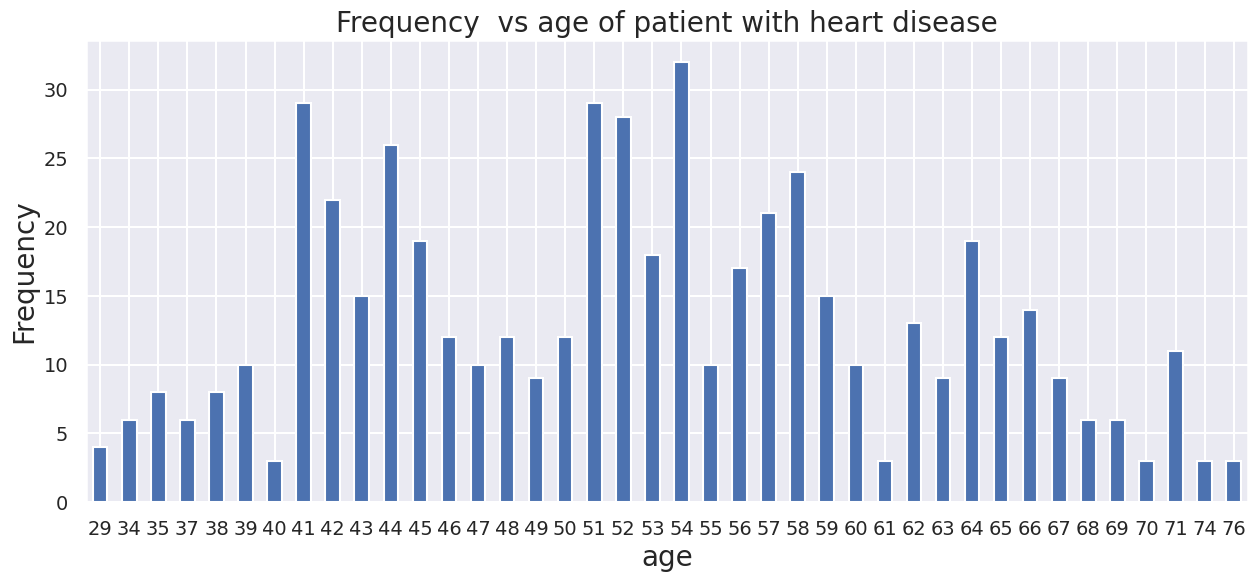

In [42]:
# frequency of patients with heart disease
ax = heart_disease_data[heart_disease_data['target'] == 1]['age'].value_counts().sort_index().plot.bar(
    figsize=(15, 6),
    fontsize= 14,
    title="Frequency  vs age of patient with heart disease",
    rot=0)
ax.set_title("Frequency  vs age of patient with heart disease", fontsize=20)
ax.set_xlabel("age", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

Percentage VS Age Plot

Text(0, 0.5, 'Percentage')

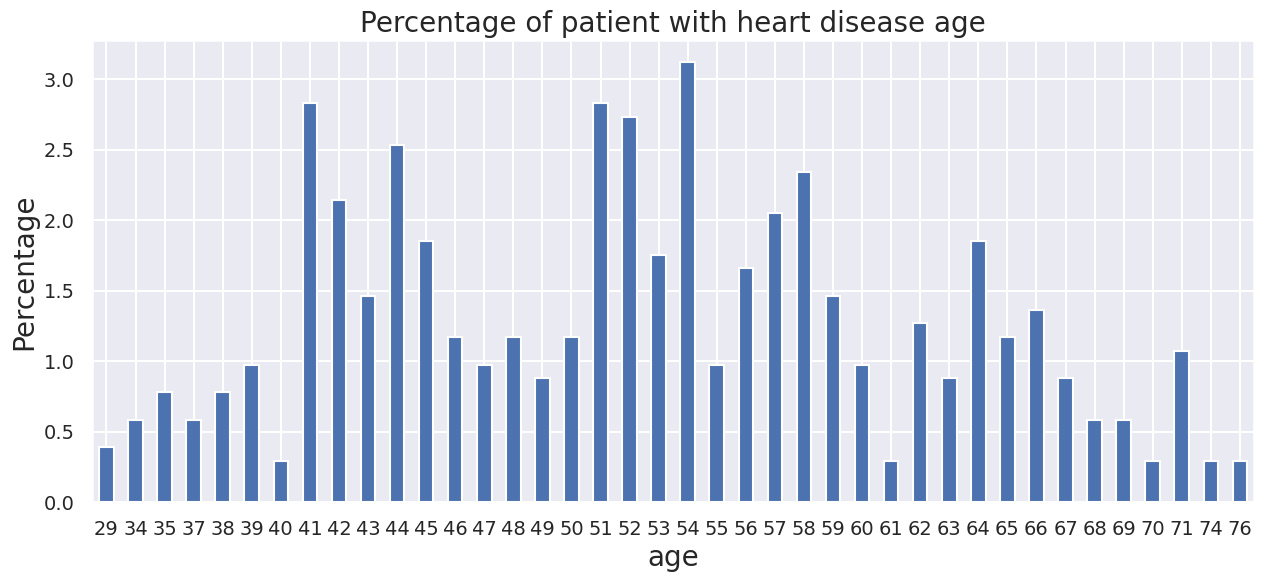

In [43]:
#Plot the bar chart of the percentage of patient with heart disease
ax = ((heart_disease_data[heart_disease_data['target'] == 1]['age'].value_counts() / len(heart_disease_data)) * 100).sort_index().plot.bar(
    figsize=(15, 6),
    fontsize= 14,
    title="Percentage  vs age of patient with heart disease",
    rot=0)
ax.set_title("Percentage of patient with heart disease age", fontsize=20)
ax.set_xlabel("age", fontsize=20)
ax.set_ylabel("Percentage", fontsize=20)


_From the above two plots we can see that patients in the age group of 40-60 have more heart disease._

Male VS Female with Heart Disease

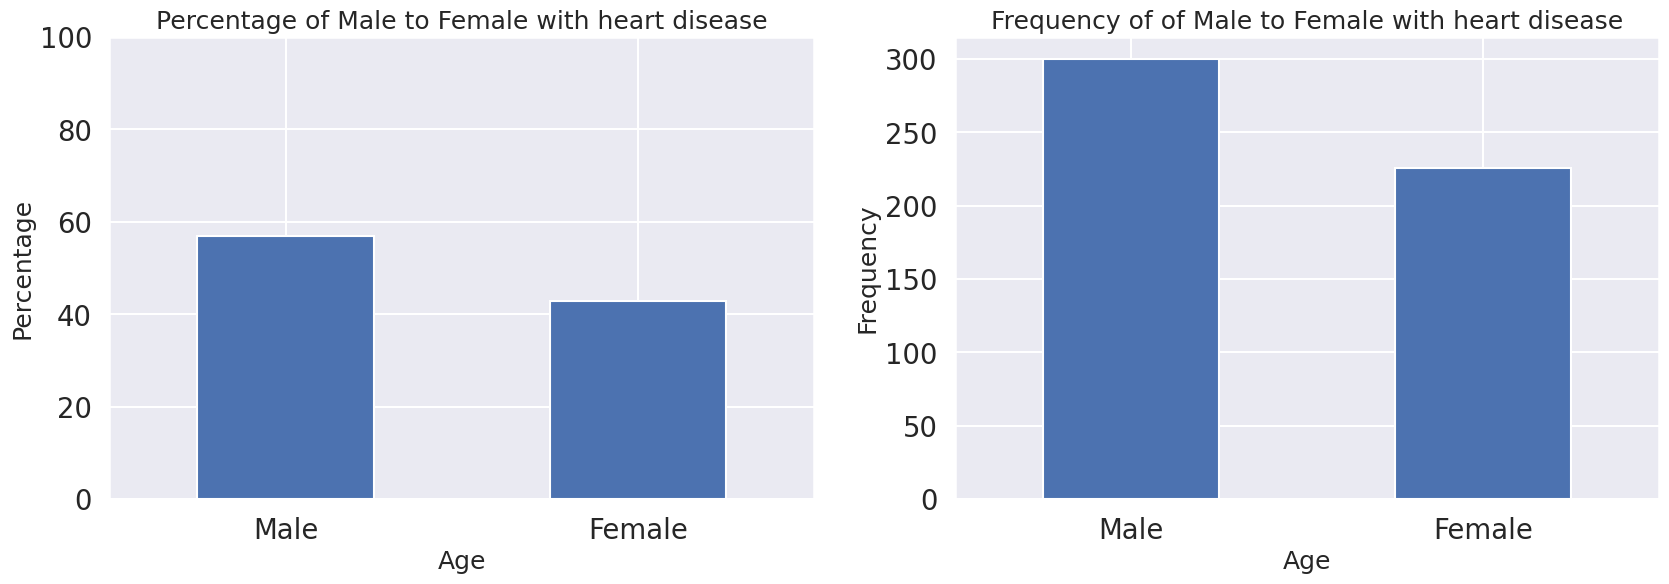

In [45]:
# precentage of male to female with heart disease
fig, axarr = plt.subplots(1, 2, figsize=(20, 6))
ticks = np.arange(2)

((heart_disease_data[heart_disease_data['target'] == 1]['sex'].value_counts() / len(heart_disease_data[heart_disease_data['target'] == 1])) * 100).plot.bar(
    rot = 0,
    ax=axarr[0])
axarr[0].set_title('Percentage of Male to Female with heart disease', fontsize=18)
axarr[0].set_xlabel("Age", fontsize=18)
axarr[0].set_ylabel("Percentage", fontsize=18)
axarr[0].set_xticks(ticks, labels=["Male", "Female"])
axarr[0].set_ylim([0,100])

#Plot the frequency of Male to Female with heart disease
heart_disease_data[heart_disease_data['target'] == 1]['sex'].value_counts().plot.bar(
    rot=0, 
    ax=axarr[1])
axarr[1].set_title('Frequency of of Male to Female with heart disease', fontsize=18)
axarr[1].set_xlabel("Age", fontsize=18)
axarr[1].set_ylabel("Frequency", fontsize=18)
axarr[1].set_xticks(ticks, labels=["Male", "Female"])

_The above graphs indicate that more males have heart disease then females_

## Machine Learning Models

In [46]:
heart_disease_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [47]:
#divide the data to target and features
X = heart_disease_data.drop(['target'], axis=1)
y = heart_disease_data.target

#Encode the catergorical data in the features data
X_encoded = pd.get_dummies(heart_disease_data, columns=['sex', 'cp','fbs','restecg','exang','slope','ca','thal'])
X_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


##### Splitting the Data
Splitting the data into train and test set.

In [56]:
#splitting thr dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state = 1)

##### Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Logistic Regression Model

In [58]:
#Cretae Logistic regression model and train the model
from sklearn.linear_model import LogisticRegression
log_Reg = LogisticRegression(random_state = 1)
log_Reg.fit(X_train,y_train)


LogisticRegression(random_state=1)

In [60]:
#Predict  the test data 
y_pred_log_Reg = log_Reg.predict(X_test)

In [61]:
#checking the performance of the model
y_pred_log_Reg_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_log_Reg })
y_pred_log_Reg_df.head(10)

,Expected,Predicted
49,0,0
525,1,1
119,1,1
629,0,0
186,0,0
691,1,1
473,1,1
422,1,1
27,0,0
815,1,1


In [62]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
log_Reg_cm = confusion_matrix(y_test, y_pred_log_Reg)
log_Reg_cm

array([[109,   0],
       [  0,  96]])

In [63]:
#Calculate the accuracy of logistic regression model
log_Reg_acc = accuracy_score(y_test, y_pred_log_Reg) 
log_Reg_acc

1.0

### K-NN Model

In [64]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors = 5, metric='minkowski',p=2)
kNN.fit(X_train,y_train )

KNeighborsClassifier()

In [65]:
#Predict  the test data 
y_pred_kNN = kNN.predict(X_test)

In [66]:
#checking the performance of the KNN model
y_pred_KNN_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_kNN })
y_pred_KNN_df.head(10)

,Expected,Predicted
49,0,0
525,1,1
119,1,1
629,0,1
186,0,0
691,1,1
473,1,0
422,1,1
27,0,0
815,1,1


In [67]:
# Making the Confusion Matrix
KNN_cm = confusion_matrix(y_test, y_pred_kNN)
KNN_cm

array([[95, 14],
       [ 5, 91]])

In [68]:
KNN_acc = accuracy_score(y_test, y_pred_kNN) 
KNN_acc

0.9073170731707317


### SVM - Support Vector Machine

In [69]:
from sklearn.svm import SVC 
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train,y_train )

SVC(kernel='linear', random_state=0)

In [70]:
#Predict  the test data 
y_pred_svc = svc.predict(X_test)

In [71]:
#checking the performance of the model
y_pred_svc_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_svc })
y_pred_svc_df.head(10)

,Expected,Predicted
49,0,0
525,1,1
119,1,1
629,0,0
186,0,0
691,1,1
473,1,1
422,1,1
27,0,0
815,1,1


In [73]:
# Making the Confusion Matrix
svc_cm = confusion_matrix(y_test, y_pred_svc)
svc_cm

array([[109,   0],
       [  0,  96]])

In [72]:
#Calculate the accuracy of SVC model
svc_acc = accuracy_score(y_test, y_pred_svc) 
svc_acc

1.0

### Naive Bayes

In [74]:
#Cretae SVM model and train the model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train )

GaussianNB()

In [75]:
#Predict  the test data 
y_pred_nb = nb.predict(X_test)

In [76]:
#checking the performance of the model
y_pred_nb_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_nb})
y_pred_nb_df.head(10)

,Expected,Predicted
49,0,0
525,1,1
119,1,1
629,0,0
186,0,0
691,1,1
473,1,1
422,1,1
27,0,0
815,1,1


In [77]:
# Making the Confusion Matrix
nb_cm = confusion_matrix(y_test, y_pred_nb)
nb_cm

array([[109,   0],
       [  0,  96]])

In [78]:
#Calculate the accuracy of Naive bayes model
nb_acc = accuracy_score(y_test, y_pred_nb) 
nb_acc

1.0

### Decision Tree Classification

In [79]:
#Cretae Decision Tree Classification model and train the model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train )

DecisionTreeClassifier()

In [80]:
#Predict  the test data 
y_pred_dtc = dtc.predict(X_test)

In [81]:
#checking the performance of the model
y_pred_dtc_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_dtc})
y_pred_dtc_df.head(10)

,Expected,Predicted
49,0,0
525,1,1
119,1,1
629,0,0
186,0,0
691,1,1
473,1,1
422,1,1
27,0,0
815,1,1


In [84]:
# Making the Confusion Matrix
dtc_cm = confusion_matrix(y_test, y_pred_dtc)
dtc_cm

array([[109,   0],
       [  0,  96]])

In [82]:
#Calculate the accuracy of Decision Tree Classification model
dtc_acc = accuracy_score(y_test, y_pred_dtc) 
dtc_acc

1.0

### Random Forest Classification

In [86]:
#Cretae Random Forest Classification model and train the model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train,y_train )

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [87]:
#Predict  the test data 
y_pred_rfc = rfc.predict(X_test)

In [88]:
#checking the performance of the model
y_pred_rfc_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_rfc})
y_pred_rfc_df.head(10)

,Expected,Predicted
49,0,0
525,1,1
119,1,1
629,0,0
186,0,0
691,1,1
473,1,1
422,1,1
27,0,0
815,1,1


In [89]:
# Making the Confusion Matrix
rfc_cm = confusion_matrix(y_test, y_pred_rfc)
rfc_cm

array([[109,   0],
       [  0,  96]])

In [92]:
#Calculate the accuracy of Random Forest Classification model
rfc_acc = accuracy_score(y_test, y_pred_dtc) 
rfc_acc

1.0

## Results and Conclusion

| Model                        | Accuracy |
|------------------------------|----------|
| Logistic Regression          | 100%     |
| K-NN                         | 90.73%   |
| Support Vector Machine       | 100%     |
| Naive Bayes                  | 100%     |
| Decision Tree Classification | 100%     |
| Random Forest Classification | 100%     |